# Targeted phytochemical for  Apple QCs


Author: Daniel Quiroz

Date: 08/24/2023

## Goal of this notebook

This notebook has the objective to exemplify the use of targeted integration of phytochemicals that are present in untargeted metabolomics
analysis of apple fruit reported in in [Bilbrey et al. (2022)](https://nph.onlinelibrary.wiley.com/doi/full/10.1111/nph.17693)

In this case, we are going to use only the *quality control (QC)* samples.

## Importing python libraries

In this section, we will upload the required in order to be able to targeted integrate a series of phytochemicals found in apples fruits.
The main library for this purpose is [ms-mint](https://github.com/LewisResearchGroup/ms-mint) which allows to targeted integrate
ions of interest. In our case, each ion of interest refers to a specific phytochemical. For example, chlorogenic acid with a monoisotopic mass
of 354.0950 Da, and the ion in positive ionization mode will be 355.1023 *m/z* while a mass of 353.0877 *m/z* corresponds to negative ionization.

In [1]:
# ms-mint: Instance for MS spectrometry data
from ms_mint.Mint import Mint
import pandas as pd # Data wrangling
import numpy as np
import re # Regular expressions
import glob # listing files
import seaborn as sns
import plotly.express as px # Interactive plots
import pickle # Export python object
#from ms_mint.notebook import Mint
mint = Mint()

## Selecting QCs files

### Negative ionization files

Here, we are going to select all QC files, and we are printing the first 5 QC files.

In [8]:
QC_files_neg = glob.glob("Data/mzML/Neg/QC*")
mint.ms_files = QC_files_neg
mint.ms_files[0:5]

['Data/mzML/Neg/QC_035.mzML',
 'Data/mzML/Neg/QC_189.mzML',
 'Data/mzML/Neg/QC_042.mzML',
 'Data/mzML/Neg/QC_014.mzML',
 'Data/mzML/Neg/QC_147.mzML']

###  Target ion list

In [28]:
target_list_neg = pd.read_excel("Data/Tables/targets.xlsx", sheet_name = "target_neg")
mint.targets = target_list_neg
mint.targets

,mz_mean,mz_width,rt,rt_min,rt_max,rt_unit,intensity_threshold,target_filename
peak_label,,,,,,,,
4-Hydroxybenzaldehyde,121.029479,10,150.00,148.00,154.00,s,1000,unknown
"3,4 dihydroxybenzoic acid",153.019309,10,112.00,110.00,117.00,s,1000,unknown
"3,5-dihydroxybenzoic acid",153.019309,10,112.00,110.00,116.00,s,1000,unknown
Protocatechiuc acid,153.019309,10,112.00,109.00,117.00,s,1000,unknown
"2,4,6- Trihydroxybenzaldehyde",153.019309,10,159.00,157.00,163.00,s,1000,unknown
p-Coumaric acid,163.040040,10,163.00,161.00,165.00,s,1000,unknown
Quercetin,301.035300,10,217.00,214.00,221.00,s,1000,unknown
Chlorogenic acid,353.087780,10,134.94,131.34,138.54,s,1000,unknown
Cyanidin-3-O-rutinoside,594.158900,10,136.26,132.66,139.86,s,1000,unknown


### Running targeted extraction

In [29]:
mint.run(fn = 'Results/Neg/raw_integration.csv')

The first glance of the results is in a long table with the integrated peak areas.

In [30]:
mint_raw_results = pd.read_csv("Results/Neg/raw_integration.csv")
mint.results = mint_raw_results
mint.results[['ms_file', 'mz_mean','peak_label', "peak_area"]].head()

,ms_file,mz_mean,peak_label,peak_area
0,Data/mzML/Neg/QC_091.mzML,121.029479,4-Hydroxybenzaldehyde,165281.0
1,Data/mzML/Neg/QC_091.mzML,153.019309,"3,4 dihydroxybenzoic acid",6183.0
2,Data/mzML/Neg/QC_091.mzML,153.019309,"3,5-dihydroxybenzoic acid",6183.0
3,Data/mzML/Neg/QC_091.mzML,153.019309,Protocatechiuc acid,6183.0
4,Data/mzML/Neg/QC_091.mzML,153.019309,"2,4,6- Trihydroxybenzaldehyde",0.0


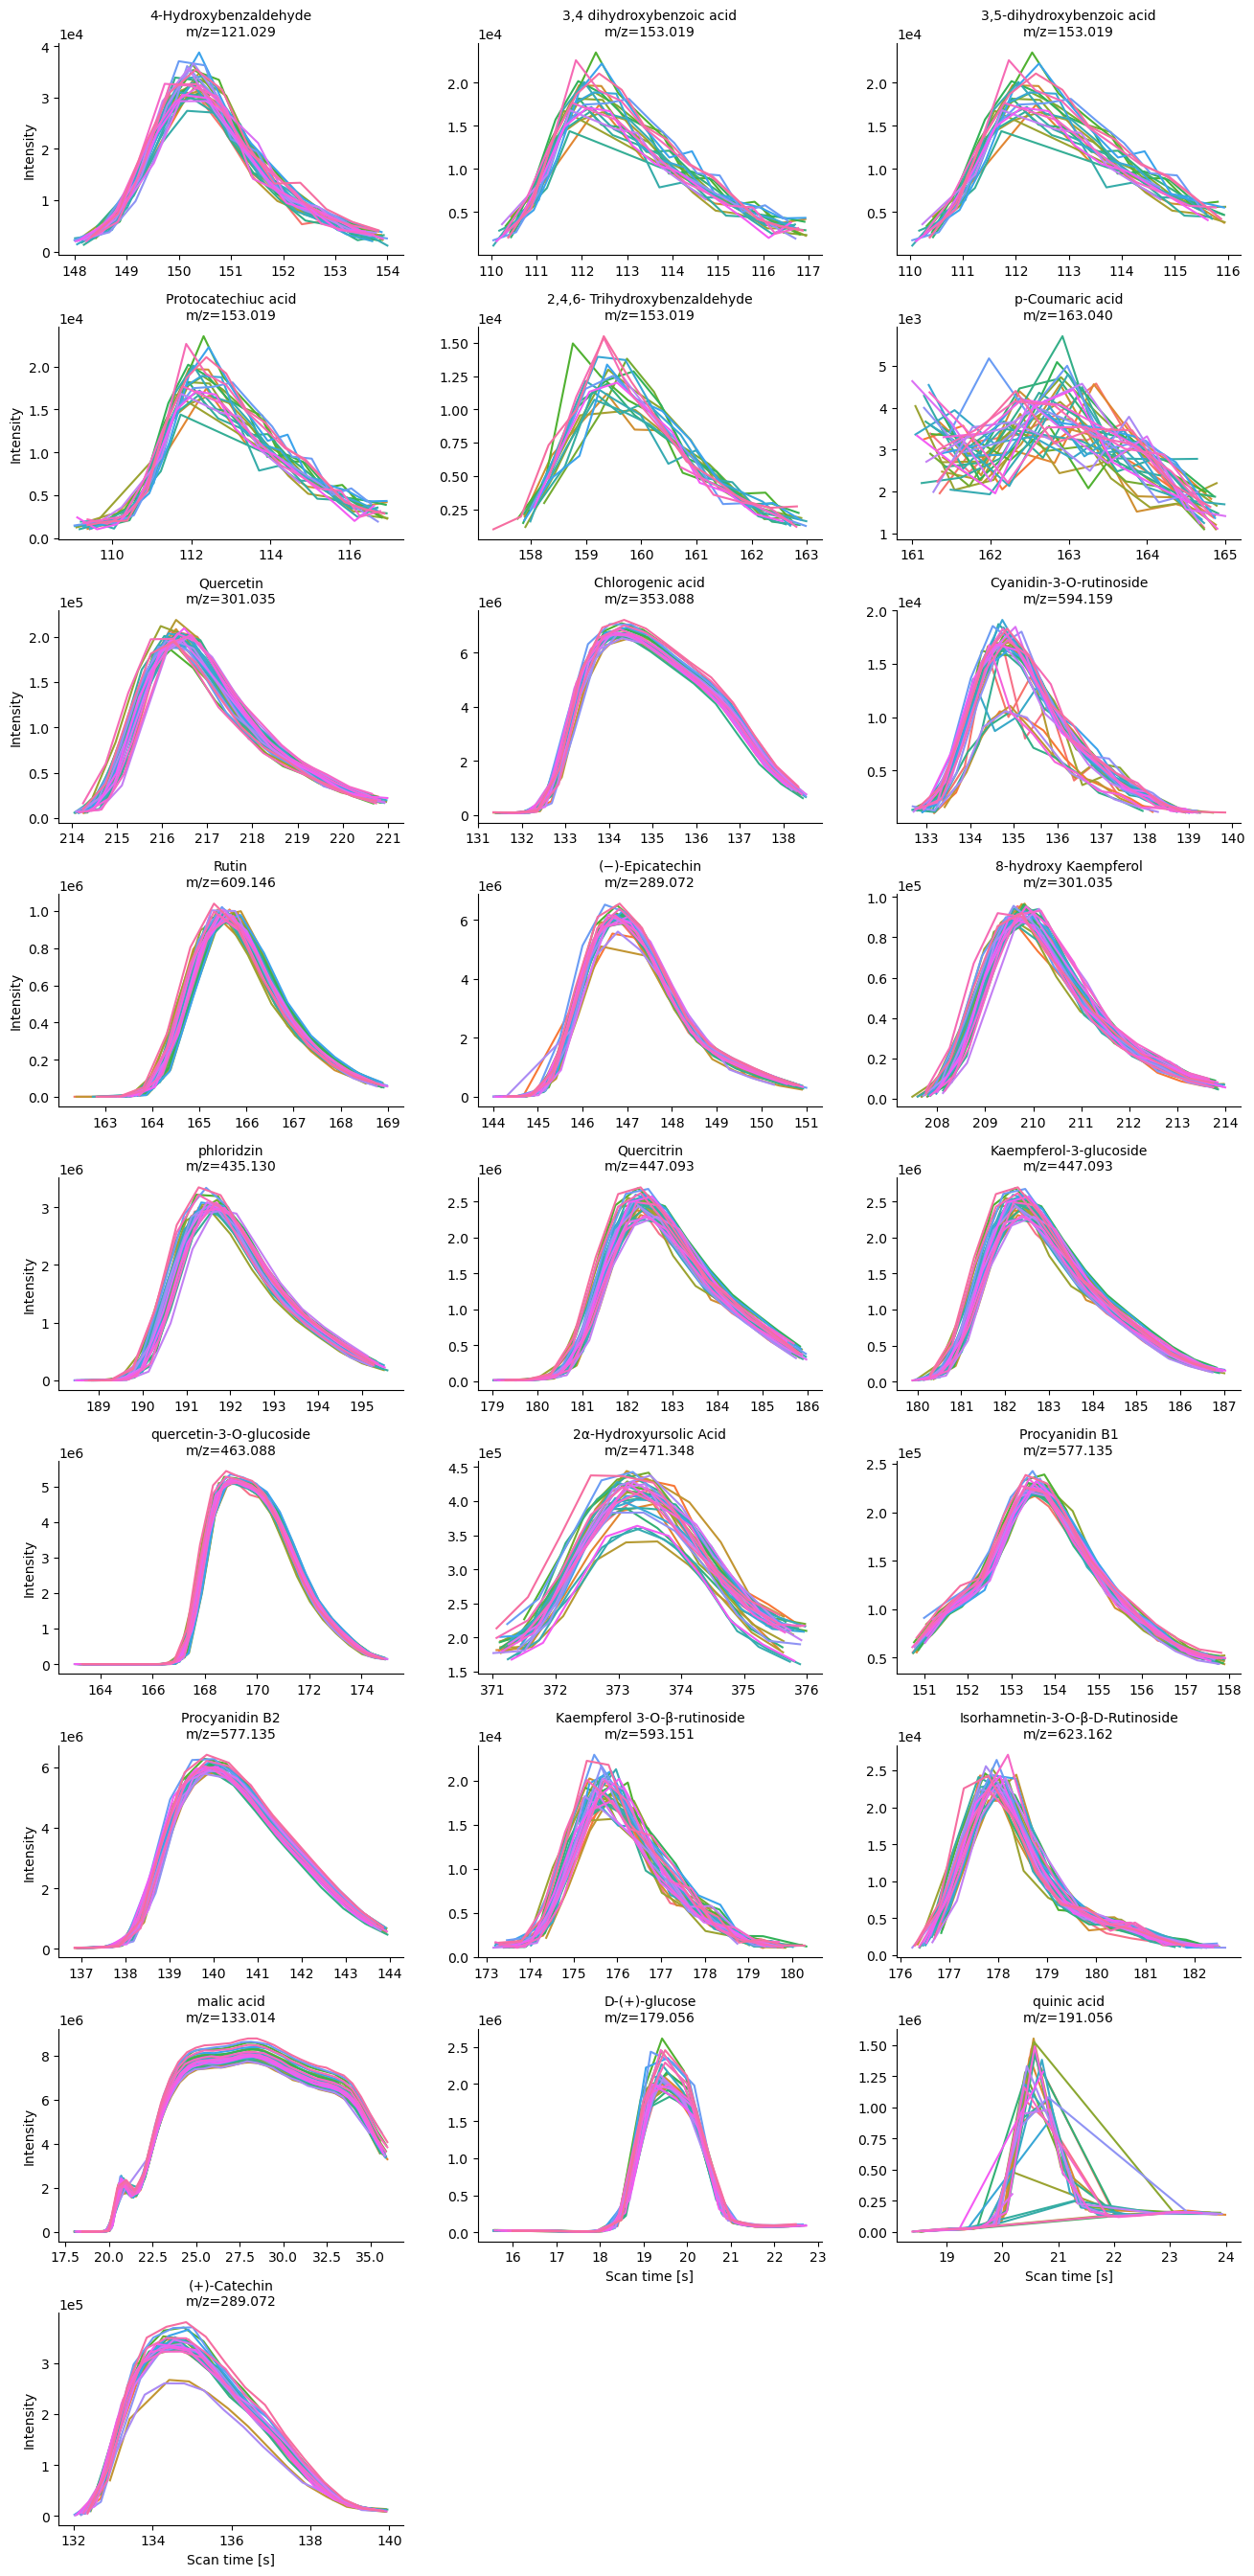

In [31]:
mint.plot.peak_shapes(col_wrap=3)